In [16]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 

In [17]:
efnet_weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
efnet_model = torchvision.models.efficientnet_b0(weights = efnet_weights)

In [18]:
print(efnet_model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [19]:
print(efnet_weights.transforms())

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)


# 1 - a
kernel_size is (3, 3).

# 1 - b

This is a technique for regularization. Randomly assign elements zero will prevent the model to overfit the data. 


In [20]:
### Read flattened, processed data
import pandas as pd
fash_mnist = pd.read_csv("https://remiller1450.github.io/data/fashion_mnist_train.csv")

## Train-test split
from sklearn.model_selection import train_test_split
train_fash, test_fash = train_test_split(fash_mnist, test_size=0.1, random_state=5)

### Separate the label column (outcome)
train_y = train_fash['y']
train_X = train_fash.drop(['y'], axis=1)
test_y = test_fash['y']
test_X = test_fash.drop(['y'], axis=1)

### Convert to numpy array then reshape to 900 by 28 by 28
mnist_unflattened = train_X.to_numpy()
mnist_unflattened = mnist_unflattened.reshape(900,28,28)

## Convert to tensor
mnist_tensor = torch.from_numpy(mnist_unflattened)
mnist_tensor =  torch.unsqueeze(mnist_tensor, dim=1)

## Transform to proper input shape (duplicate the single color channel to produce 3 channels)
new_mnist_tensors = mnist_tensor.expand(-1, 3, -1, -1)

## Store in DataLoader
from torch.utils.data import DataLoader, TensorDataset
y_tensor = torch.Tensor(train_y)
train_loader = DataLoader(TensorDataset(new_mnist_tensors.type(torch.FloatTensor), y_tensor.type(torch.LongTensor)), batch_size=100)


In [21]:
## Loop through each parameter and set `requires_grad` to false
for param in efnet_model.features.parameters():
    param.requires_grad = False
## Replace the "classifier" layer with one for our application
efnet_model.classifier = torch.nn.Sequential( 
    torch.nn.Linear(in_features=1280, out_features=10, bias=True))

In [22]:
sum([np.prod(np.array(param.shape)) for param in efnet_model.features.parameters() ])

4007548

# 2-a 

Total number of parameters are 4007548. 

# 2-b

avgpool will not learn any parameter fron the dataset. 

In [51]:
# Question 3a

import os

path = './cats_dogs/'
img_names = os.listdir(path)
img_names.sort()
# img_names.remove('.DS_Store')


In [73]:
images = np.empty(shape = (len(img_names), 64, 64, 3))
for idx, name in enumerate(img_names):
    img_name = path + name
    # Use you favourite library to load the image
    image = plt.imread(img_name).astype('int64')
    images[idx] = image
images = images.astype('int64')


In [74]:
images = torch.from_numpy(images)
images = torch.movedim(images, source = 3, destination = 1)

classes = [1,0] 

## Repeat an appropriate number of times (print to check)
labels = np.repeat(classes, [50, 100], axis=0)

In [75]:
from sklearn.model_selection import train_test_split
train_X_image, test_X_image, train_y_image, test_y_image = train_test_split(images, labels, 
                                                                            test_size = 0.25, random_state = 5)

In [76]:
test_y_image

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0])

In [78]:
from torch.utils.data import DataLoader, TensorDataset

bsize = 28

train_y_tensor = torch.Tensor(train_y_image)
train_loader = DataLoader(TensorDataset(train_X_image.type(torch.FloatTensor), 
                        train_y_tensor.type(torch.LongTensor)), batch_size=bsize)
test_y_tensor = torch.Tensor(test_y_image)
test_loader = DataLoader(TensorDataset(test_X_image.type(torch.FloatTensor), 
                        test_y_tensor.type(torch.LongTensor)), batch_size=bsize)

In [79]:
#3 -b

## Compose Transformations
from torchvision import transforms
data_transforms = transforms.Compose([
        transforms.GaussianBlur(kernel_size=(5,5), sigma=(0.1, 5)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(degrees=(0, 180))
])

In [80]:
# 3-c

efnet_weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
efnet_model = torchvision.models.efficientnet_b0(weights = efnet_weights)

## Loop through each parameter and set `requires_grad` to false
for param in efnet_model.features.parameters():
    param.requires_grad = False
    
## Replace the "classifier" layer with one for our application
efnet_model.classifier = torch.nn.Sequential( 
    torch.nn.Linear(in_features=1280, out_features=2, bias=True))

In [81]:
## Hyperparms
epochs = 100
lrate = 0.01

## Cost Function
from torch import nn
cost_fn = nn.CrossEntropyLoss()

## Network model
torch.manual_seed(7) # For reproduction purposes (should be minor since only the last layers are randomly intialized)
net = efnet_model

## Optimizer (using ADAM, a more flexible algorithm than SGD this time)
optimizer = torch.optim.Adam(net.parameters(), lr=lrate)

## Initial values for cost tracking
track_cost = np.zeros(epochs)
cur_cost = 0.0

## Loop through the data
for epoch in range(epochs):
    
    cur_cost = 0.0
    correct = 0.0
    
    ## train_loader is iterable and numbers knows the batch
    for i, data in enumerate(train_loader, 0):
        
        ## The input tensor and labels tensor for the current batch
        inputs, labels = data
        
        ## Transform the input data using our data augmentation strategies
        inputs = data_transforms(inputs)
        
        ## Clear the gradient from the previous batch
        optimizer.zero_grad()
        
        ## Provide the input tensor into the network to get outputs
        outputs = net(inputs)
        
        ## Calculate the cost for the current batch
        ## nn.Softmax is used because net outputs prediction scores and our cost function expects probabilities and labels
        cost = cost_fn(nn.Softmax(dim=1)(outputs), labels)
        
        ## Calculate the gradient
        cost.backward()
        
        ## Update the model parameters using the gradient
        optimizer.step()
        
        ## Track the current cost (accumulating across batches)
        cur_cost += cost.item()
    
    ## Store the accumulated cost at each epoch
    track_cost[epoch] = cur_cost
    # print(f"Epoch: {epoch} Cost: {cur_cost}") ## Uncomment this if you want printed updates

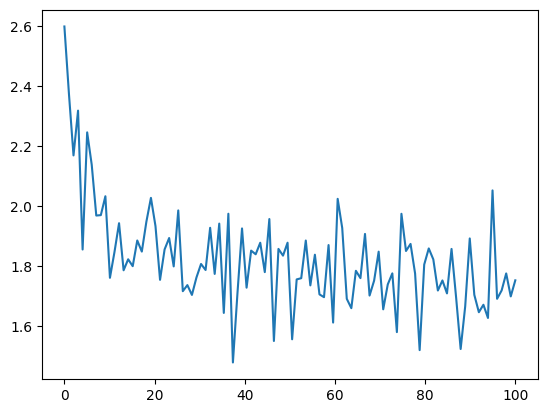

In [85]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, epochs, epochs), track_cost)
plt.show()

In [86]:
#  3-d
def accuracy_cnn(name, loader):
    ## Initialize objects for counting correct/total 
    correct = 0
    total = 0

    # Specify no changes to the gradient in the subsequent steps (since we're not using these data for training)
    with torch.no_grad():
        for data in loader:
            # Current batch of data
            images, labels = data
            
            # pass each batch into the network
            outputs = net(images)
            
            # the class with the maximum score is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            
            # add size of the current batch
            total += labels.size(0)
            
            # add the number of correct predictions in the current batch
            correct += (predicted == labels).sum().item()

    ## Calculate and print the proportion correct
    print(f'{name} accuracy is {correct/total}')

In [87]:
accuracy_cnn('training', train_loader)
accuracy_cnn('testing', test_loader)

training accuracy is 0.8125
testing accuracy is 0.7368421052631579


In [88]:
#3 - e
## "unfreeze" parameters
for param in net.features.parameters():
    param.requires_grad = True

## ## Hyperparms
epochs = 100
lrate = 0.00001

## Cost Function
cost_fn = nn.CrossEntropyLoss()

## Optimizer (using a more flexible algorithm than SGD this time)
optimizer = torch.optim.Adam(net.parameters(), lr=lrate)

## Initial values for cost tracking
import numpy as np
track_cost = np.zeros(epochs)
cur_cost = 0.0

## Loop through the data
for epoch in range(epochs):
    
    cur_cost = 0.0
    correct = 0.0
    
    ## train_loader is iterable and numbers knows the batch
    for i, data in enumerate(train_loader, 0):
        
        ## The input tensor and labels tensor for the current batch
        inputs, labels = data
        
        ## Transform the input data using our data augmentation strategies
        inputs = data_transforms(inputs)
        
        ## Clear the gradient from the previous batch
        optimizer.zero_grad()
        
        ## Provide the input tensor into the network to get outputs
        outputs = net(inputs)
        
        ## Calculate the cost for the current batch
        ## nn.Softmax is used because net outputs prediction scores and our cost function expects probabilities and labels
        cost = cost_fn(nn.Softmax(dim=1)(outputs), labels)
        
        ## Calculate the gradient
        cost.backward()
        
        ## Update the model parameters using the gradient
        optimizer.step()
        
        ## Track the current cost (accumulating across batches)
        cur_cost += cost.item()
    
    ## Store the accumulated cost at each epoch
    track_cost[epoch] = cur_cost
    # print(f"Epoch: {epoch} Cost: {cur_cost}") ## Uncomment this if you want printed updates

    

In [89]:
#3 - f

accuracy_cnn('training', train_loader)
accuracy_cnn('testing', test_loader)

training accuracy is 0.8660714285714286
testing accuracy is 0.9210526315789473
